In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with h5py.File('/work/hmzhao/irregular-lc/random-even-batch-0.h5') as inp:
    X_random = inp['X_random'][...]
    X_even = inp['X_even'][...]
    Y = inp['Y'][...]

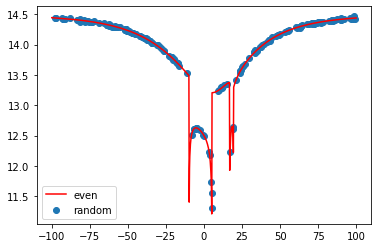

[0.00000000e+00 5.00000000e+01 2.01316315e-01 1.04415608e-04
 1.24546358e-01 9.61692272e-01 2.38364923e+02]


In [32]:
num = 18
plt.plot(X_even[num][:, 0], X_even[num][:, 1], color='red')
plt.scatter(X_random[num][:, 0], X_random[num][:, 1])
plt.legend(['even', 'random'])
plt.show()
print(Y[num])
# plt.plot(X[num][:, 0], X[num][:, 1])
# plt.errorbar(X[num][:, 0], X[num][:, 1], yerr = X[num][:, 2])